In [1]:
from sympy import *
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
init_printing()

### Parameter derivatives of the VMC energy

Take a derivative of the VMC energy with respect to parameters in the wavefunction.   Express it in terms of values to be collected during a VMC run.

In [2]:
# Wavefunction
psi = Function('psi')

# Variational parameter
p = Symbol('p')

# Local energy
Eloc = Function('E_L')

# Spatial coordinate
x = Symbol('x')

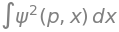

In [3]:
# Wavefunction normalization integral

norm = Integral(psi(p,x)*psi(p,x),x)
norm

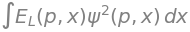

In [4]:
# Energy integral (numerator)
num = Integral(psi(p,x)*psi(p,x)*Eloc(p,x),x)
num

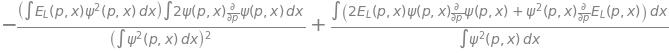

In [5]:
# Derivative with respect to parameter p
pd = diff(num/norm,p)
pd

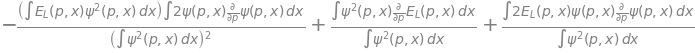

In [6]:
expand(pd)

In [7]:
# Define a function that is the derivative the local energy (wrt parameter p)
Eloc_p = Function("E'")
Eloc_p

E'

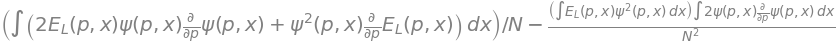

In [8]:
# Replace normalization integral with N
N = Symbol('N')
pd2 = pd.subs(norm, N)
pd2

In [9]:
d = diff(Eloc(p,x),p)
d, type(d)

(Derivative(E_L(p, x), p), sympy.core.function.Derivative)

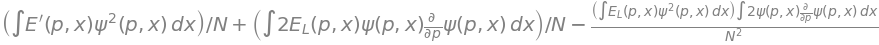

In [10]:
# Replace derivative of local energy with function
pd3 = expand(pd2.replace(diff(Eloc(p,x),p), Eloc_p(p,x)))
pd3

In [11]:
# Define function that is the derivative of the wavefunction (wrt parameter p)
psi_p = Function("\psi'")
psi_p

\psi'

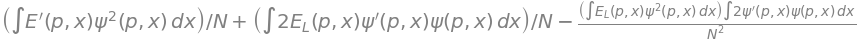

In [12]:
pd4 = pd3.replace(diff(psi(p,x),p),psi_p(p,x))
pd4

In [13]:
# Need to collect
# E_L (the usual VMC energy), E',  E_L*psi', and psi'/psi

E_ave = Symbol("<E>")
Ep_ave = Symbol("<E'>")
psip_ave = Symbol("<\psi'/\psi>")
E_psip_ave = Symbol("<E \psi'/\psi>")

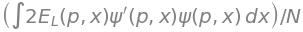

In [14]:
E_psip_integral = Integral(2*Eloc(p,x) * psi_p(p,x) * psi(p,x), x)/N
E_psip_integral

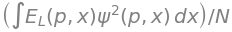

In [15]:
E_integral = Integral(Eloc(p,x) * psi(p,x)**2, x)/N
E_integral

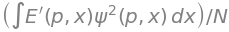

In [16]:
Ep_integral = Integral(Eloc_p(p,x) * psi(p,x)**2, x)/N
Ep_integral

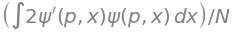

In [17]:
psip_integral = Integral(2*psi_p(p,x) * psi(p,x),x)/N
psip_integral

In [18]:
pd5 = pd4.subs(E_integral, E_ave).subs(Ep_integral, Ep_ave).\
subs(psip_integral, 2*psip_ave).subs(E_psip_integral, 2*E_psip_ave)
pd5